In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import glob
files = glob.glob('../../filldata/*')
files

['../../filldata/Data_Scaler_20180510.csv',
 '../../filldata/Data_Scaler_20181127.csv']

In [3]:
# Data loading and pre-processing:
#merged_data = pd.DataFrame()

for filename in sorted(files, reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

In [4]:
data_dir = '../../filldata/'

In [5]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [6]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [7]:
#Prepare only s_i for normalization

#dataset_train = dataset_train.drop(dataset_train.columns[3], axis=1)  # Prepare only s_0
#dataset_train = dataset_train.drop(dataset_train.columns[2], axis=1)  # Prepare only s_0
#dataset_test = dataset_test.drop(dataset_test.columns[3], axis=1)  # Prepare only s_0
#dataset_test = dataset_test.drop(dataset_test.columns[2], axis=1) # Prepare only s_0
#print(dataset_train)
#print(dataset_test)
dataset_train = dataset_train.drop(dataset_train.columns[3], axis=1)  # Prepare only s_1
dataset_train = dataset_train.drop(dataset_train.columns[1], axis=1)  # Prepare only s_1
dataset_test = dataset_test.drop(dataset_test.columns[3], axis=1)  # Prepare only s_1
dataset_test = dataset_test.drop(dataset_test.columns[1], axis=1) # Prepare only s_1
print(dataset_train)
print(dataset_test)
#dataset_train = dataset_train.drop(dataset_train.columns[2], axis=1)  # Prepare only s_2
#dataset_train = dataset_train.drop(dataset_train.columns[1], axis=1)  # Prepare only s_2
#dataset_test = dataset_test.drop(dataset_test.columns[2], axis=1)  # Prepare only s_2
#dataset_test = dataset_test.drop(dataset_test.columns[1], axis=1) # Prepare only s_2
#print(dataset_train)
#print(dataset_test)

                           Ch   s1
Timestamp                         
2018-05-10 20:54:19+00:00   0    0
2018-05-10 20:54:19+00:00   1    0
2018-05-10 20:54:19+00:00   2    0
2018-05-10 20:54:19+00:00   3    0
2018-05-10 20:54:19+00:00   4    0
...                        ..  ...
2018-05-11 10:22:55+00:00  11  596
2018-05-11 10:22:55+00:00  12  634
2018-05-11 10:22:55+00:00  13  589
2018-05-11 10:22:55+00:00  14  525
2018-05-11 10:22:55+00:00  15  596

[1065584 rows x 2 columns]
                           Ch  s1
Timestamp                        
2018-11-27 22:50:15+00:00   0  24
2018-11-27 22:50:15+00:00   1  39
2018-11-27 22:50:15+00:00   2  36
2018-11-27 22:50:15+00:00   3  12
2018-11-27 22:50:15+00:00   4  18
...                        ..  ..
2018-11-28 07:03:41+00:00  11  17
2018-11-28 07:03:41+00:00  12  18
2018-11-28 07:03:41+00:00  13  14
2018-11-28 07:03:41+00:00  14  17
2018-11-28 07:03:41+00:00  15  21

[649568 rows x 2 columns]


In [8]:
from sklearn import preprocessing

# Normalize TRAIN data
scaler = preprocessing.MinMaxScaler()

X_train = dataset_train.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_train.iloc[:,1:]), columns=dataset_train.columns[1:])
df['Timestamp'] = dataset_train.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#X_train[['s0']] = df [['s0']].values
X_train[['s1']] = df [['s1']].values
#X_train[['s2']] = df [['s2']].values
display(X_train)

# Random shuffle training data
X_train = X_train.sample(frac=1)
display(X_train)

,Ch,s1
Timestamp,,
2018-05-10 20:54:19+00:00,0,0.000000
2018-05-10 20:54:19+00:00,1,0.000000
2018-05-10 20:54:19+00:00,2,0.000000
2018-05-10 20:54:19+00:00,3,0.000000
2018-05-10 20:54:19+00:00,4,0.000000
...,...,...
2018-05-11 10:22:55+00:00,11,0.000149
2018-05-11 10:22:55+00:00,12,0.000159
2018-05-11 10:22:55+00:00,13,0.000147


,Ch,s1
Timestamp,,
2018-05-11 00:48:33+00:00,11,0.777478
2018-05-11 06:07:39+00:00,10,0.550435
2018-05-11 06:19:31+00:00,5,0.472014
2018-05-11 08:50:58+00:00,5,0.393819
2018-05-11 10:03:15+00:00,2,0.388361
...,...,...
2018-05-10 23:16:22+00:00,10,0.855928
2018-05-11 08:43:43+00:00,3,0.378426
2018-05-11 09:27:43+00:00,12,0.407902


In [9]:
# Normalize TEST data
X_test = dataset_test.iloc[:, [0]]

df = pd.DataFrame(scaler.fit_transform(dataset_test.iloc[:,1:]), columns=dataset_test.columns[1:])
df['Timestamp'] = dataset_test.index
df.set_index('Timestamp')
first_column = df.pop('Timestamp')
df.insert(0, 'Timestamp', first_column)
#print(X_train.head)
#print(df.head)
#X_test[['s0']] = df [['s0']].values
X_test[['s1']] = df [['s1']].values
#X_test[['s2']] = df [['s2']].values
display(X_test)

,Ch,s1
Timestamp,,
2018-11-27 22:50:15+00:00,0,0.000045
2018-11-27 22:50:15+00:00,1,0.000073
2018-11-27 22:50:15+00:00,2,0.000067
2018-11-27 22:50:15+00:00,3,0.000022
2018-11-27 22:50:15+00:00,4,0.000034
...,...,...
2018-11-28 07:03:41+00:00,11,0.000032
2018-11-28 07:03:41+00:00,12,0.000034
2018-11-28 07:03:41+00:00,13,0.000026


In [10]:
#Prepocessing, drop channel column
X_train=X_train.drop(X_train.columns[[0]], axis=1)
display(X_train)
X_test = X_test.drop(X_test.columns[[0]], axis=1)
display(X_test)

,s1
Timestamp,
2018-05-11 00:48:33+00:00,0.777478
2018-05-11 06:07:39+00:00,0.550435
2018-05-11 06:19:31+00:00,0.472014
2018-05-11 08:50:58+00:00,0.393819
2018-05-11 10:03:15+00:00,0.388361
...,...
2018-05-10 23:16:22+00:00,0.855928
2018-05-11 08:43:43+00:00,0.378426
2018-05-11 09:27:43+00:00,0.407902


,s1
Timestamp,
2018-11-27 22:50:15+00:00,0.000045
2018-11-27 22:50:15+00:00,0.000073
2018-11-27 22:50:15+00:00,0.000067
2018-11-27 22:50:15+00:00,0.000022
2018-11-27 22:50:15+00:00,0.000034
...,...
2018-11-28 07:03:41+00:00,0.000032
2018-11-28 07:03:41+00:00,0.000034
2018-11-28 07:03:41+00:00,0.000026


In [11]:
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dropout 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


tensorflow.random.set_seed(10)
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1(0.0)))
model.add(Dense(3, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='sigmoid',kernel_initializer='glorot_uniform')) #sigmoid at last level, batch size=100, threshold=0.0017
#model.add(Dense(10, activation='relu',kernel_initializer='glorot_uniform'))  #relu at last level, batch size=50, threshold=0.00078
model.add(Dense(X_train.shape[1],kernel_initializer='glorot_uniform')) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


2022-08-08 15:18:10.379523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/thepeg/2.2.3-bb611/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft-nightlies.cern.ch/lcg/latest/MCGenerators/herwig++/7.2.3-5f56d/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


2022-08-08 15:18:16.602394: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-08 15:18:16.602441: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lxplus782.cern.ch): /proc/driver/nvidia/version does not exist
2022-08-08 15:18:16.603477: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#Fit the model
history=model.fit(np.array(X_train),np.array(X_train),epochs=100,
                  validation_split=0.20,
                  batch_size=100,shuffle=True,
                  verbose = 1)

Epoch 1/100
8525/8525 [==============================] - 11s 1ms/step - loss: 0.0039 - val_loss: 2.3431e-05
Epoch 2/100
8525/8525 [==============================] - 10s 1ms/step - loss: 9.7639e-06 - val_loss: 3.4433e-06
Epoch 3/100
8525/8525 [==============================] - 10s 1ms/step - loss: 1.8269e-06 - val_loss: 1.2581e-06
Epoch 4/100
8525/8525 [==============================] - 10s 1ms/step - loss: 1.0090e-06 - val_loss: 6.5014e-07
Epoch 5/100
8525/8525 [==============================] - 9s 1ms/step - loss: 8.9460e-07 - val_loss: 6.0090e-07
Epoch 6/100
8525/8525 [==============================] - 10s 1ms/step - loss: 8.4492e-07 - val_loss: 5.5876e-07
Epoch 7/100
8525/8525 [==============================] - 10s 1ms/step - loss: 8.0486e-07 - val_loss: 5.0800e-07
Epoch 8/100
8525/8525 [==============================] - 10s 1ms/step - loss: 7.7781e-07 - val_loss: 5.2529e-07
Epoch 9/100
8525/8525 [==============================] - 10s 1ms/step - loss: 7.6044e-07 - val_loss: 9.5904e-

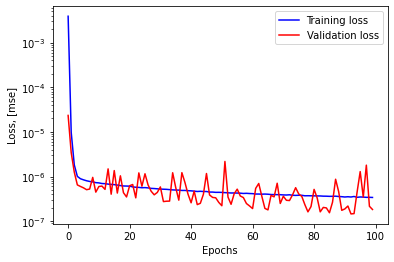

In [13]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()

In [14]:
#Compute RMSE
pred = model.predict(X_train)
score1 = np.sqrt(metrics.mean_squared_error(pred,X_train))

pred = model.predict(X_test)
score2 = np.sqrt(metrics.mean_squared_error(pred,X_test))


print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Test Samples Good Score (RMSE): {score2}")


Insample Good Score (RMSE): 0.00042882517799350836
Test Samples Good Score (RMSE): 0.0009869031087100962


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Mon/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.01, 1000)

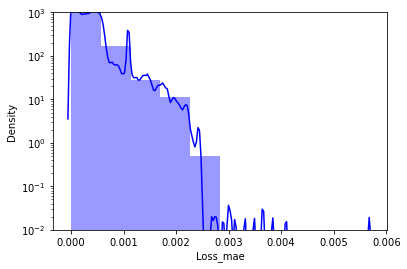

In [15]:
# Distribution of loss function in the training set
import seaborn as sns
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
#display(scored)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)

In [16]:
# Setting threshold

X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.0018 #sigmoid+batch_size=100
#scored['Threshold'] = 0.00078 #relu+batch_size=50
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,0.001112,0.0018,False
2018-11-27 22:50:15+00:00,0.001096,0.0018,False
2018-11-27 22:50:15+00:00,0.001098,0.0018,False
2018-11-27 22:50:15+00:00,0.001129,0.0018,False
2018-11-27 22:50:15+00:00,0.001121,0.0018,False


In [17]:
# all train data

X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.0018  #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])

<AxesSubplot:xlabel='Timestamp'>

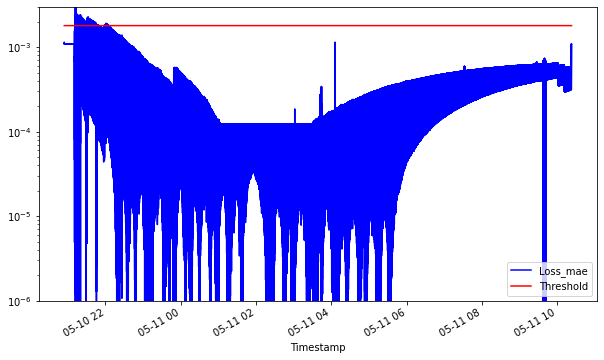

In [18]:
scored_train.plot(logy=True,  figsize = (10,6), ylim = [1e-6,3e-3], color = ['blue','red'])

<AxesSubplot:xlabel='Timestamp'>

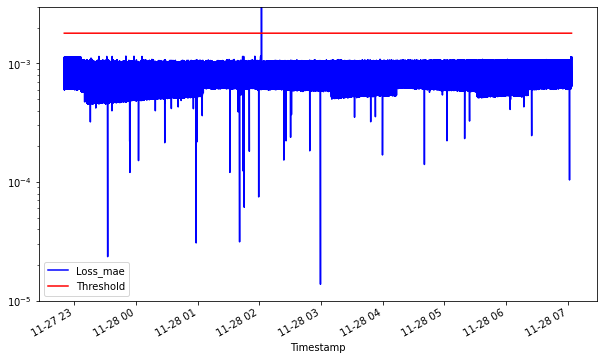

In [19]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-5,3e-3,], color = ['blue','red'])

<AxesSubplot:xlabel='Timestamp', ylabel='s1'>

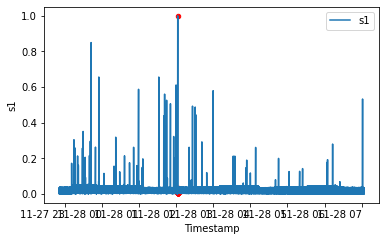

In [20]:
#Plot anomalies-Test 
anomalies = scored.loc[scored['Anomaly'] == True]
df=anomalies.merge(X_test[['s1']], on = 'Timestamp', how='left')
df['Timestamp'] = df.index
ax=X_test.plot()
df.plot.scatter(ax=ax, x= 'Timestamp', y='s1', color= 'r')

<AxesSubplot:xlabel='Timestamp', ylabel='s1'>

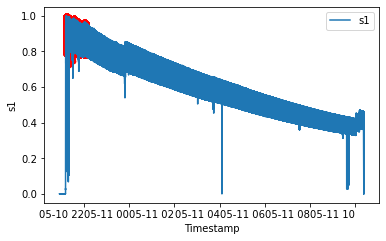

In [21]:
#Plot anomalies on the data plot-train
anomalies2 = scored_train.loc[scored_train['Anomaly'] == True]
df1=anomalies2.merge(X_train[['s1']], on = 'Timestamp', how='left')
df1['Timestamp'] = df1.index
ax=X_train.plot()
df1.plot.scatter(ax=ax, x= 'Timestamp', y='s1', color= 'r')